# Analyzing Open University Learning Analytics Dataset

#### Reference: https://archive.ics.uci.edu/ml/datasets/Open+University+Learning+Analytics+dataset#

#### Complete data and data description: https://analyse.kmi.open.ac.uk/open_dataset

Open University Learning Analytics Dataset (OULAD) contains data about courses, students and their interactions with Virtual Learning Environment (VLE) for seven selected courses (called modules)----AAA, BBB, CCC, DDD, EEE, FFF, GGG. Presentations of courses start in February and October - they are marked by 'B' and 'J' respectively (2013B, 2013J, 2014B, 2014J). The dataset consists of tables connected using unique identifiers. Dataset is stored in several csv files
<ol>
    <li>assessements.csv (206)</li>
    <li>courses.csv (22)</li>
    <li>studentAssessment.csv (173912)</li>
    <li>studentInfo.csv (32593)</li>
    <li>studentRegistration.csv (32593)</li>
    <li>studentVle.csv (10655280)</li>
    <li>vle.csv (6364)</li>
</ol>

------------------------------------------------------------------------------------------------------------------------------

<a id='TOC'></a>
## Content

1. [Executive summary](#Executive_summary)
2. [Introduction](#Introduction)
3. [Problem statement](#Problem_statement)
4. [Solution methodology](#Solution_methodology)
5. [Experimental setup and data used](#Experimental)
6. [Results](#Results)
7. [Conclusions](#Conclusions)


--------------------------------------------------------------------------------------------------------------

<a id='Executive_summary'></a>
## 1. Executive summary
###### [TOC](#TOC)

<a id='Introduction'></a>
## 2. Introduction
###### [TOC](#TOC)

Effective identification of the vulnerable students allows the institution to conduct appropriate measures in order to keep the students on track. Evaluation and overview outcomes of courses can also be a valuable tool with which the teaching staff is able to recognize difficulty points and enhance possible lectures. In addition, analysis and estimation of the learning experience with a virtual learning environment may be valuable resources for promoting large open online courses. The Open University introduces various initiatives to promote work in this field, such as calling by specialist support teams and, above all, building a dataset. The reality, combined with aggregated data from click-flow experiences of students in the Virtual Learning environment, makes a date set special. This helps student performance to be evaluated, defined by their actions. The data collection provides information on 22 classes, 32,593 candidates, their assessment outcomes, and their experiences with the VLE as a result of a routine review of student clicks.


<a id='Problem_statement'></a>
## 3. Problem statement
###### [TOC](#TOC)

<a id='Solution_methodology'></a>
## 4. Solution methodology
###### [TOC](#TOC)

<a id='Experimental'></a>
## 5. Experimental setup and data used
###### [TOC](#TOC)

<a id='Results'></a>
## 6. Results
###### [TOC](#TOC)

<a id='Results'></a>
## 7. Conclusions
###### [TOC](#TOC)

In [7]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
plt.rcdefaults()
import seaborn as sns
%matplotlib inline

In [8]:
# Read the Dataset
student_info = pd.read_csv('Dataset/studentInfo.csv')
student_assessment = pd.read_csv('Dataset/studentAssessment.csv')
student_registration = pd.read_csv('Dataset/studentRegistration.csv')
student_vle = pd.read_csv('Dataset/studentVle.csv')
assessments = pd.read_csv('Dataset/assessments.csv')
courses = pd.read_csv('Dataset/courses.csv')
vle = pd.read_csv('Dataset/vle.csv')

print('Courses     : ',courses.shape[0])
print('Assessments : ',assessments.shape[0])
print('vle(Virtual Learning Environment) : ',vle.shape[0])
print('Student Info         : ',student_info.shape[0])
print('student Assessment   : ',student_assessment.shape[0])
print('student Registration : ',student_registration.shape[0])
print('student Vle          : ',student_vle.shape[0])

Courses     :  22
Assessments :  206
vle(Virtual Learning Environment) :  6364
Student Info         :  32593
student Assessment   :  173912
student Registration :  32593
student Vle          :  10655280


<p style="color:red;"> TODO: Add student_info descriptions - column definitions </p>

In [9]:
student_info.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


<p style="color:red;"> TODO: Add student_assessment descriptions - column definitions </p>

In [10]:
student_assessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78
1,1752,28400,22,0,70
2,1752,31604,17,0,72
3,1752,32885,26,0,69
4,1752,38053,19,0,79


<p style="color:red;"> TODO: Add student_registration descriptions - column definitions </p>

In [11]:
student_registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159,?
1,AAA,2013J,28400,-53,?
2,AAA,2013J,30268,-92,12
3,AAA,2013J,31604,-52,?
4,AAA,2013J,32885,-176,?


<p style="color:red;"> TODO: Add student_vle descriptions - column definitions </p>

In [12]:
student_vle.head()


,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1


<p style="color:red;"> TODO: Add assessments descriptions - column definitions </p>

In [13]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19,10.0
1,AAA,2013J,1753,TMA,54,20.0
2,AAA,2013J,1754,TMA,117,20.0
3,AAA,2013J,1755,TMA,166,20.0
4,AAA,2013J,1756,TMA,215,30.0


<p style="color:red;"> TODO: Add courses descriptions - column definitions </p>

In [14]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


<p style="color:red;"> TODO: Add vle descriptions - column definitions </p>

In [15]:
vle.head()

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,?,?
1,546712,AAA,2013J,oucontent,?,?
2,546998,AAA,2013J,resource,?,?
3,546888,AAA,2013J,url,?,?
4,547035,AAA,2013J,resource,?,?


In [16]:
student_info.shape

(32593, 12)

In [17]:
student_assessment.shape

(173912, 5)

In [18]:
student_registration.shape

(32593, 5)

In [19]:
student_vle.shape

(10655280, 6)

In [20]:
assessments.shape

(206, 6)

In [21]:
courses.shape

(22, 3)

In [22]:
vle.shape

(6364, 6)

-------------------------------------------------------------------------------------------------------------------------------

## Exploratory data analysis of Student Info

Pass           12361
Withdrawn      10156
Fail            7052
Distinction     3024
Name: final_result, dtype: int64


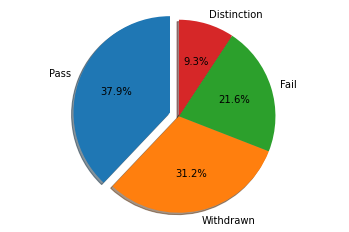

In [23]:
print(student_info['final_result'].value_counts())
labels = student_info['final_result'].unique()
sizes = student_info['final_result'].value_counts()
explode = (0.1, 0, 0, 0) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

<p>Let's check the demographic overview of the students</p>

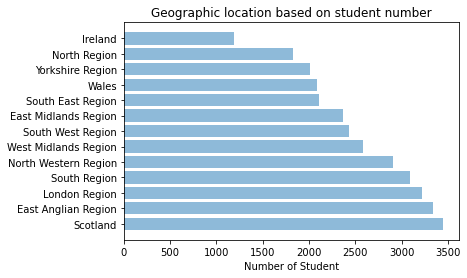

In [24]:
objects = ('Scotland', 
           'East Anglian Region', 
           'London Region', 
           'South Region',
           'North Western Region', 
           'West Midlands Region', 
           'South West Region', 
           'East Midlands Region', 
           'South East Region',
           'Wales', 
           'Yorkshire Region',
           'North Region',
           'Ireland' )
y_pos = np.arange(len(objects))
# Region wise total students
total_students_per_region = student_info['region'].value_counts(sort=True).to_list()
plt.barh(y_pos, total_students_per_region, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Number of Student')
plt.title('Geographic location based on student number')
plt.show()

<p style="color:red;"> TODO: Check Interpretation | Make a viable story line for this </p>

Which region students takes more credits than others region?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

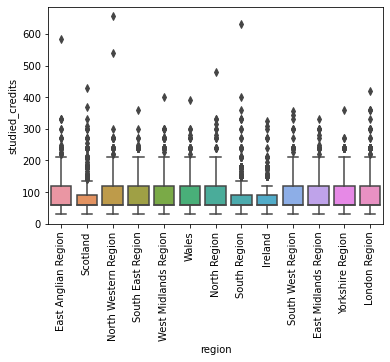

In [25]:
sns.boxplot(x = 'region', y = 'studied_credits', data=student_info)
plt.xticks(rotation = 90)

What is the academic performance scenario belongs to each regional students?

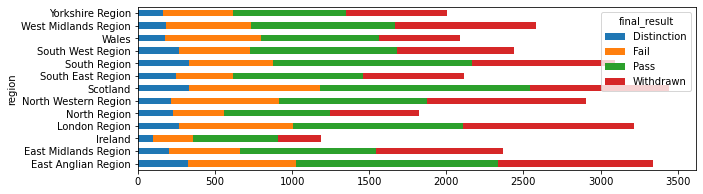

In [26]:
pd.crosstab(student_info.region, student_info.final_result).plot.barh(stacked = True, figsize=(10,3));

We found failures in some regions more than other regions. So we want to investigate more into those regional students.

In [27]:
student_info_fail = student_info[student_info["final_result"] =='Fail']

total_students_by_region = student_info.groupby(['region']).size().reset_index(name='Total Student').sort_values(by="Total Student",ascending=False)
failed_students_by_region = student_info_fail.groupby(['region']).size().reset_index(name='Total Failed').sort_values(by="Total Failed",ascending=False)
merged_total_and_failed_by_region = pd.merge(failed_students_by_region, total_students_by_region, on='region')
merged_total_and_failed_by_region['Percentage'] = round(merged_total_and_failed_by_region['Total Failed'] / merged_total_and_failed_by_region['Total Student'] * 100,3)

regions_with_higher_failure_ratio = merged_total_and_failed_by_region[merged_total_and_failed_by_region['Percentage'] >20]
regions_with_higher_failure_ratio


,region,Total Failed,Total Student,Percentage
0,Scotland,852,3446,24.724
1,London Region,744,3216,23.134
2,North Western Region,704,2906,24.226
3,East Anglian Region,698,3340,20.898
4,Wales,620,2086,29.722
5,West Midlands Region,551,2582,21.340
9,Yorkshire Region,449,2006,22.383
12,Ireland,261,1184,22.044


We see that the failure rate is more than 20% in 7 different regions among 13. Let's dig deeper into them next.
What is the gender scenerio among the students? Time to find out which gender is dominating 

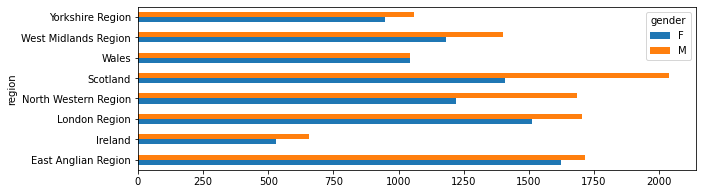

In [28]:
filtered_student_info = student_info[student_info.region.isin(regions_with_higher_failure_ratio['region'])]
pd.crosstab(filtered_student_info.region, filtered_student_info.gender).plot.barh(figsize=(10,3));

It appears the regions are male dominated.

But what about Higher Education scenario in this areas? Let's find out

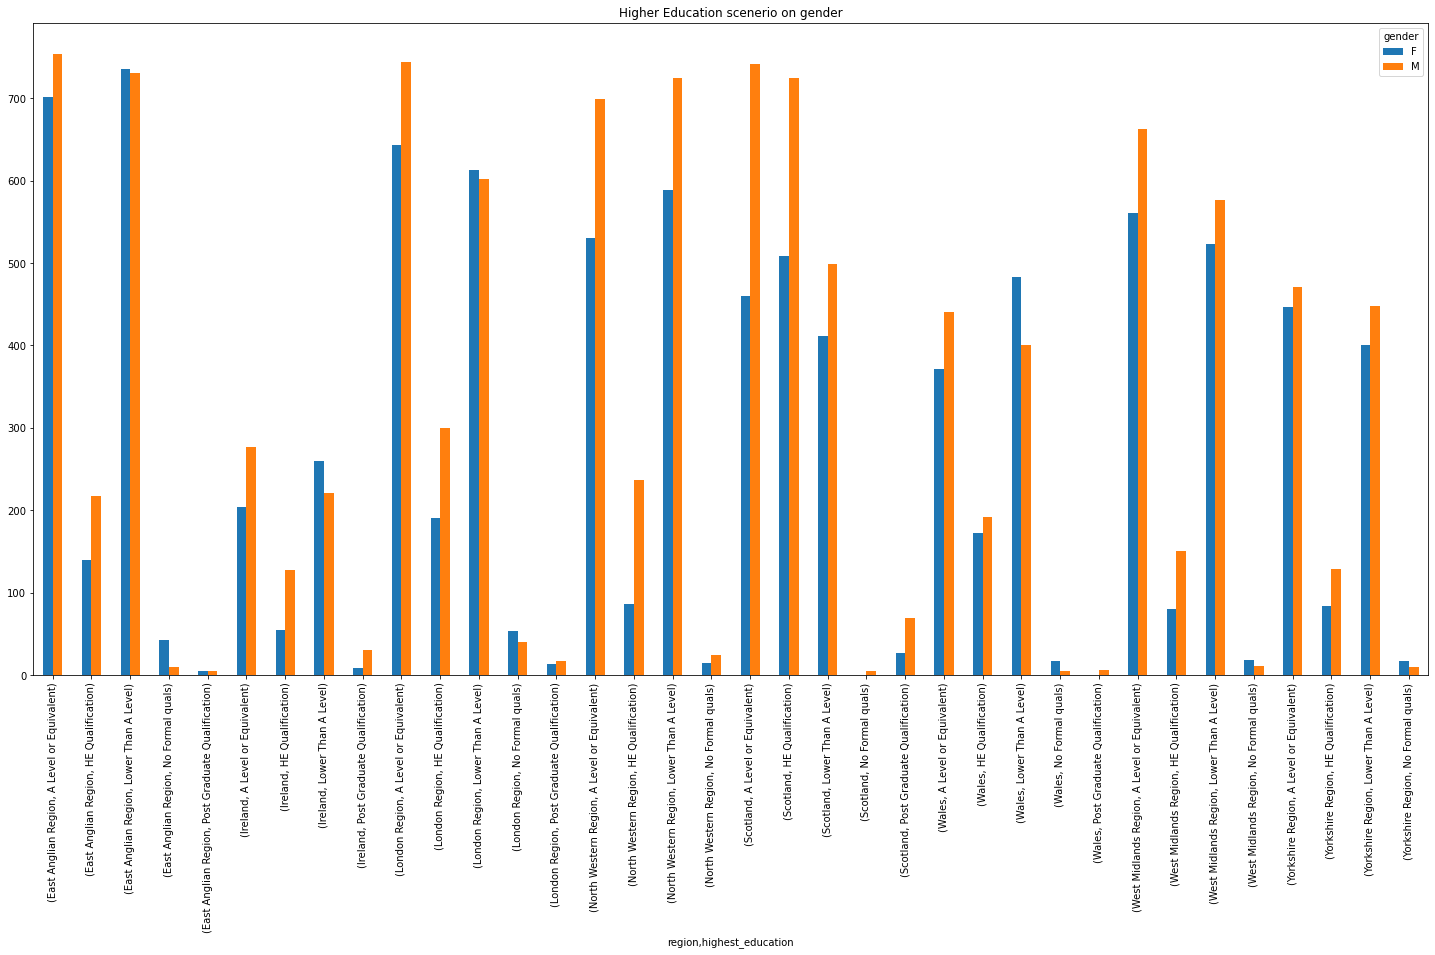

In [29]:
filtered_student_info.groupby(['region','highest_education','gender']).size().unstack().plot(kind='bar', title='Higher Education scenerio on gender',figsize=(25,12))
plt.show()

This shows that very few regions(4 out of 8) have the students with <b>Post Graduation Qualification</b>. Even though that number is very much low. Again the discrimination among male & female in all type of education level is significant.

Question is, which category of Higher Education most students have?

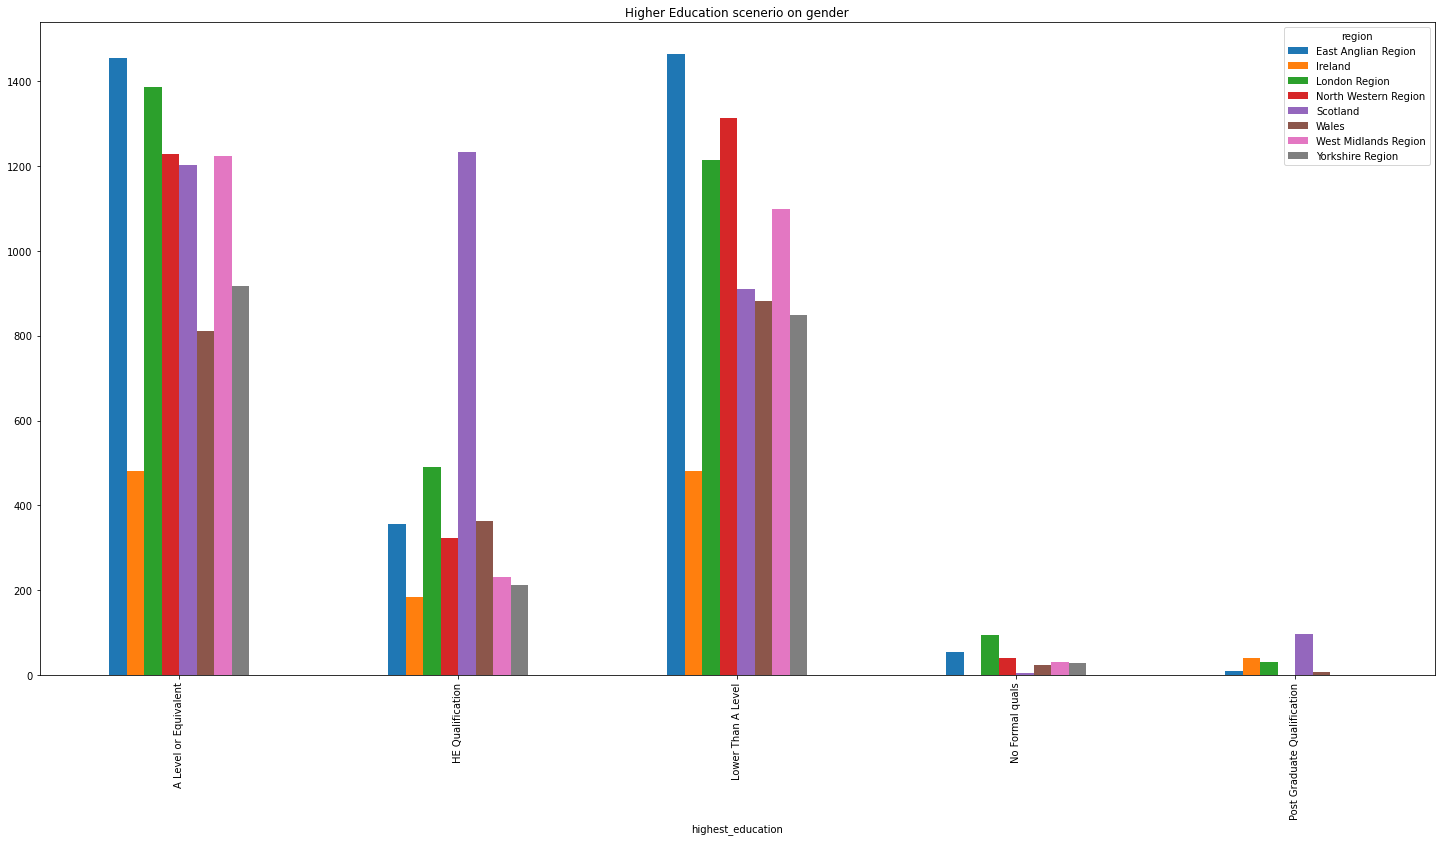

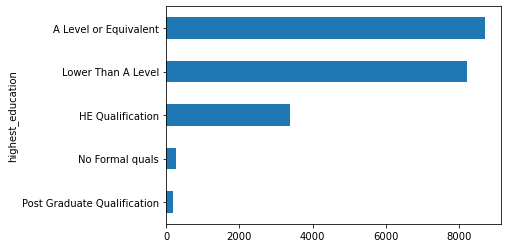

In [30]:
filtered_student_info.groupby(['highest_education','region']).size().unstack().plot(kind='bar', title='Higher Education scenerio on gender',figsize=(25,12))
plt.show()

filtered_student_info.groupby(['highest_education']).size().sort_values(ascending=True).plot(kind='barh')

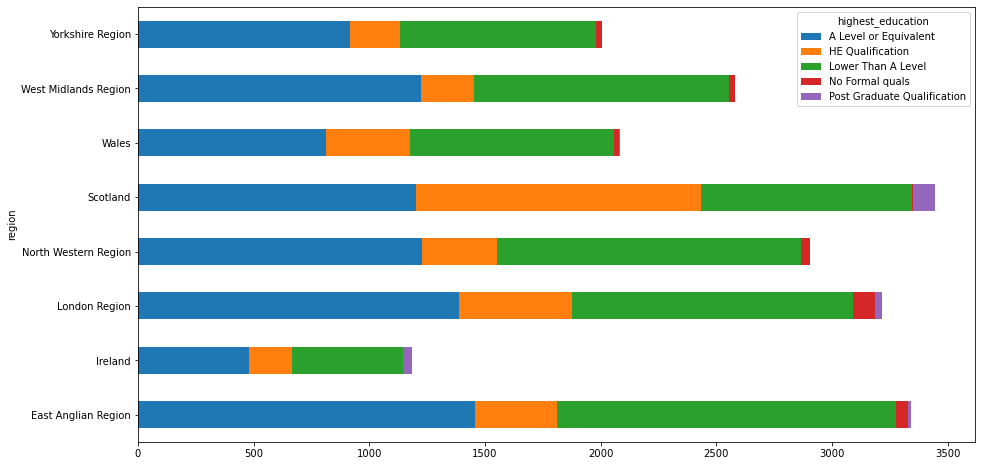

In [31]:
pd.crosstab(filtered_student_info.region, filtered_student_info.highest_education).plot.barh(stacked = True, figsize=(15,8));

<p style="color:red;"> TODO: Add Quantity</p>
It turns out most of the students has <b>A Level or Equivalent</b> education level

Now we'll check the previous attempts and try to find out if it reflects the education level of the regions. That means, wherever overall education level is low, it is expected that previous attemps in those regions should be higher.

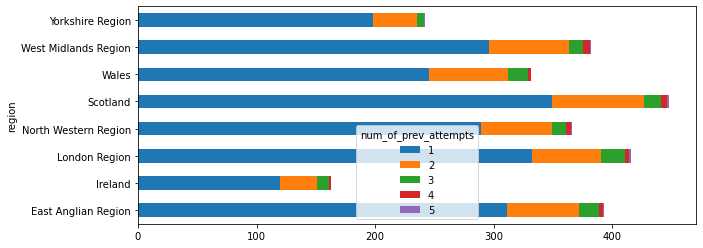

In [32]:
filtered_student_info_previous_attempt_not_0 = filtered_student_info[filtered_student_info['num_of_prev_attempts'] != 0]
pd.crosstab(filtered_student_info_previous_attempt_not_0.region, filtered_student_info_previous_attempt_not_0.num_of_prev_attempts).plot.barh(stacked = True, figsize=(10,4));

<p style="color:red;"> TODO: Add Quantity</p>
We found that <b>Scotland</b> tops, followed by <b>London</b> in the case of previous attempts. So lets find out students with respect to their education level by the regions.

highest_education,A Level or Equivalent,HE Qualification,Lower Than A Level,No Formal quals,Post Graduate Qualification
region,,,,,
East Anglian Region,135,30,218,9,1
Ireland,63,20,74,0,6
London Region,193,65,143,10,5
North Western Region,142,30,190,4,0
Scotland,157,136,141,0,14
Wales,123,38,166,3,1
West Midlands Region,169,30,177,6,0
Yorkshire Region,112,21,102,7,0


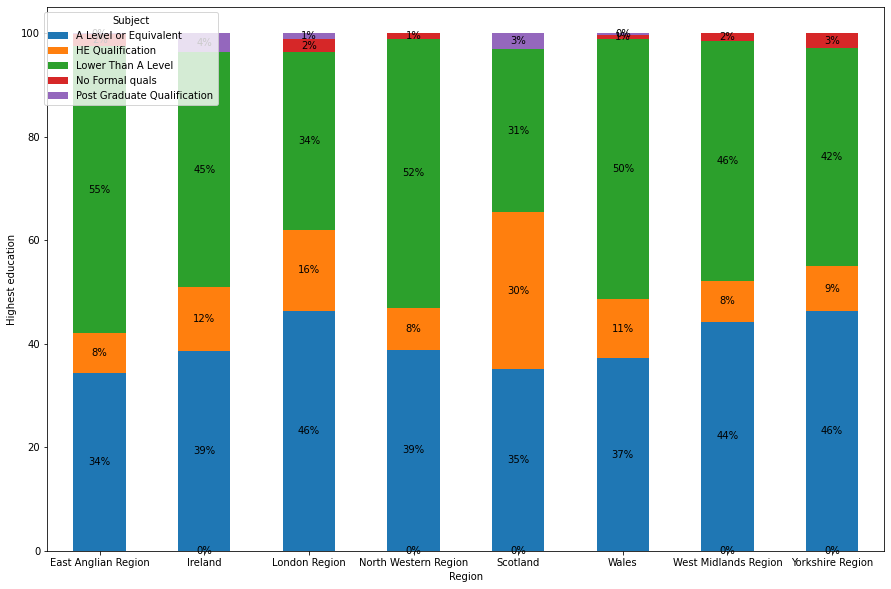

In [33]:
ax= pd.crosstab(filtered_student_info_previous_attempt_not_0['region'], filtered_student_info_previous_attempt_not_0['highest_education']).apply(lambda r: r/r.sum()*100, axis=1)
ax_1 = ax.plot.bar(figsize=(15,10),stacked=True, rot=0)
display(pd.crosstab(filtered_student_info_previous_attempt_not_0['region'], filtered_student_info_previous_attempt_not_0['highest_education']))

plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0), title="Subject")

plt.xlabel('Region')
plt.ylabel('Highest education')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='center')

plt.show()

Students from London and Scotland have the most number of previous attemps. However, from the last plot it shows that this two regions has the highest parcentage of educated students(considering A level or Equivalent/HE Qualification/Post Graduate Qualification as good educatiion measure). Let's dig deep into these regions to find out more.

Question - Students from which education band needed to take most previous attempts?

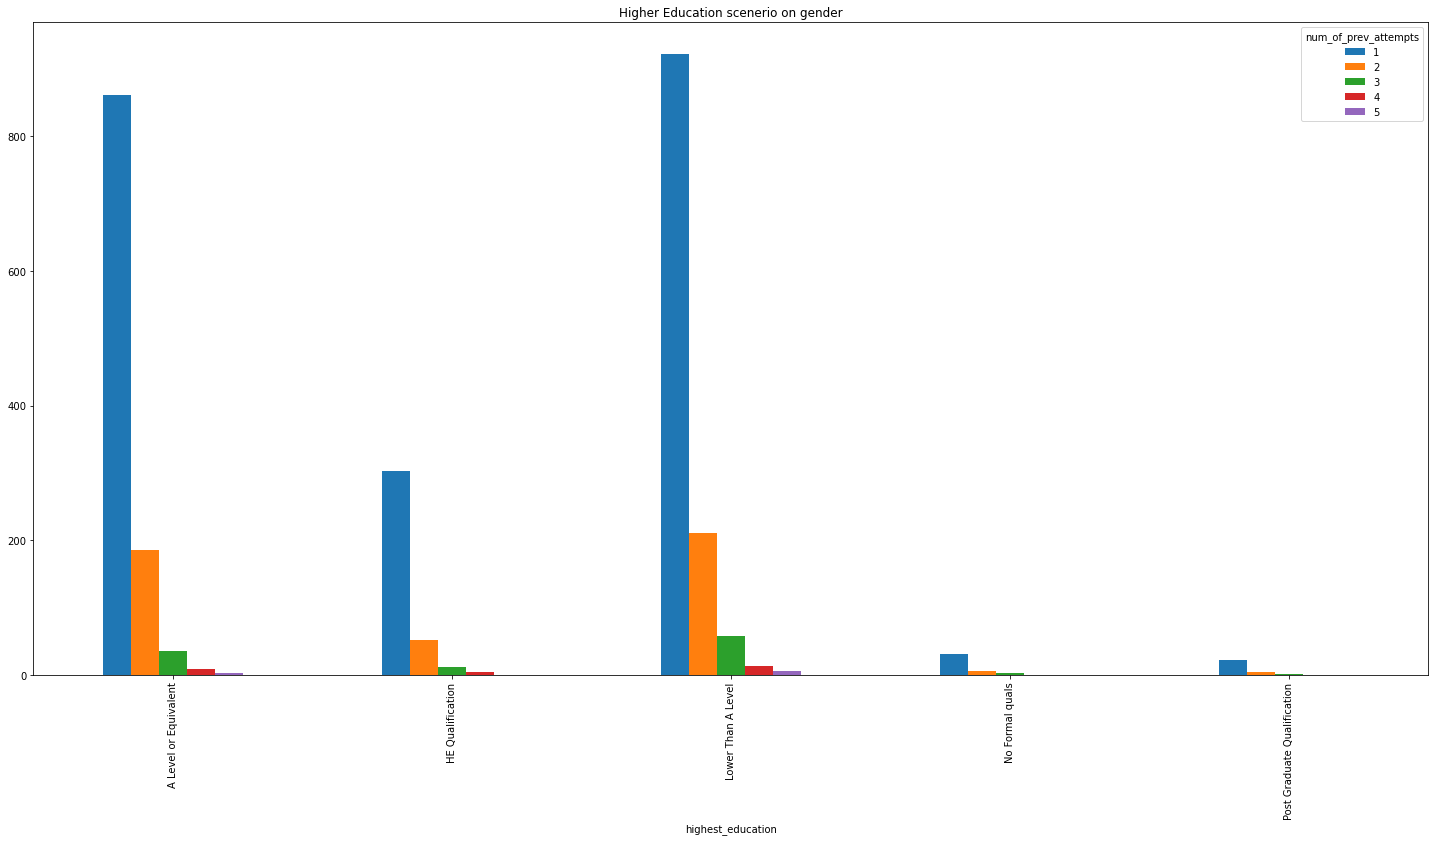

In [34]:
filtered_student_info_previous_attempt_not_0.groupby(['highest_education','num_of_prev_attempts']).size().unstack().plot(kind='bar', title='Higher Education scenerio on gender',figsize=(25,12))
plt.show()

It shows maximum students who has previous attempts, falls in the education level <b>Lower Than A Level<b/>

Question - Which age band they fall into?
What we mean is, those students who have one or more previous attemps and who fall under the education level of <i>Lower Than A Level</i>, we want to find their age level.

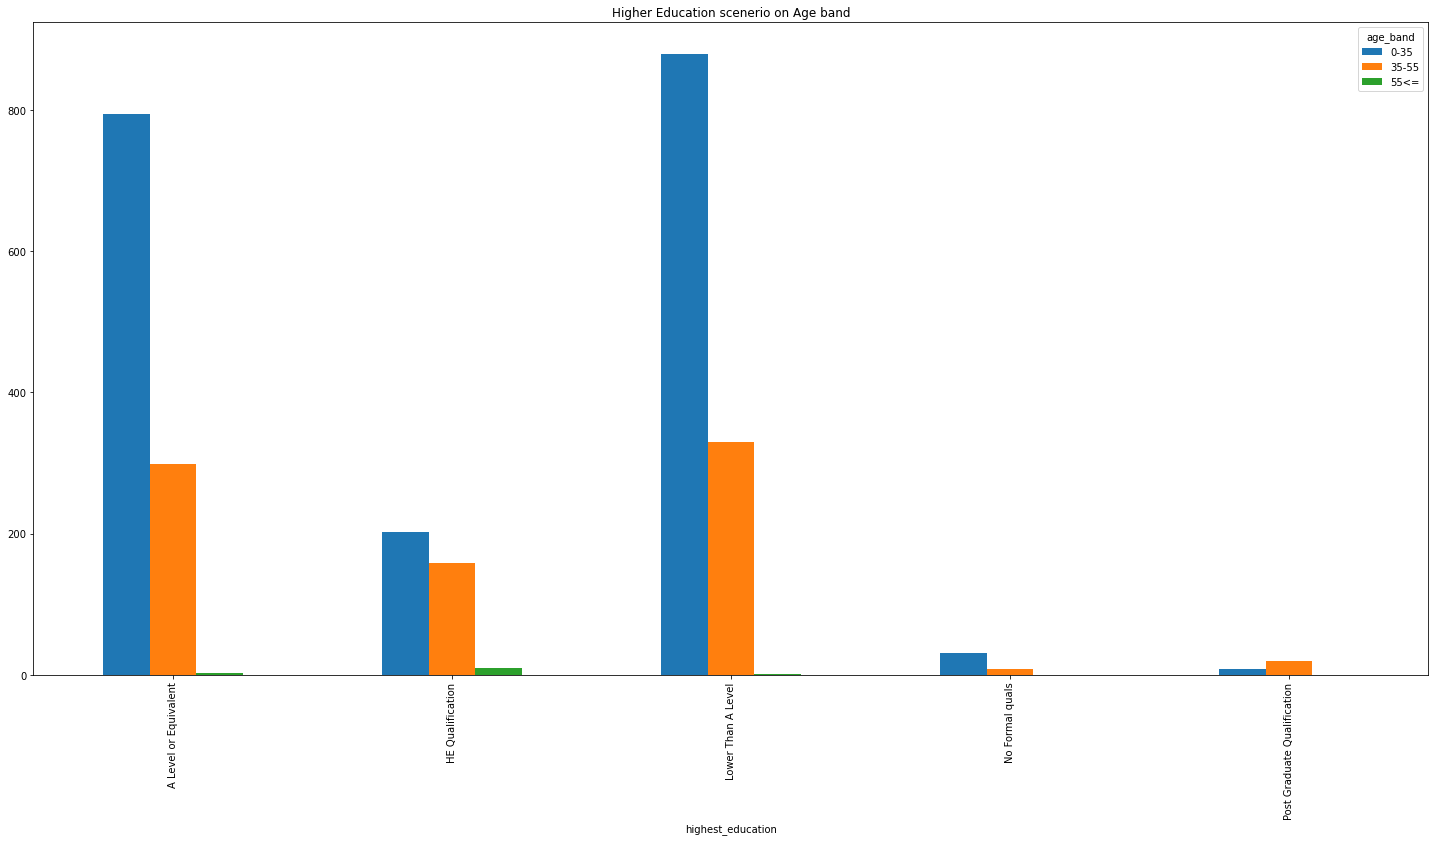

In [35]:
filtered_student_info_previous_attempt_not_0.groupby(['highest_education','age_band']).size().unstack().plot(kind='bar', title='Higher Education scenerio on Age band',figsize=(25,12))
plt.show()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
422,AAA,2014J,135335,F,East Anglian Region,Lower Than A Level,20-30%,0-35,1,120,N,Withdrawn
435,AAA,2014J,155984,F,East Anglian Region,Lower Than A Level,70-80%,0-35,1,120,N,Pass
651,AAA,2014J,1472925,F,East Anglian Region,Lower Than A Level,40-50%,35-55,1,60,Y,Pass
670,AAA,2014J,1970390,M,West Midlands Region,Lower Than A Level,0-10%,35-55,1,120,N,Pass
675,AAA,2014J,2073016,F,London Region,Lower Than A Level,30-40%,35-55,1,60,N,Fail


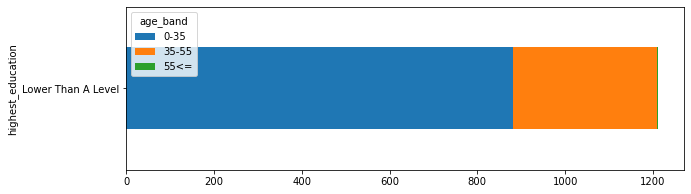

In [36]:
filtered_student_info_previous_attempt_not_0_lower_A_Level = filtered_student_info_previous_attempt_not_0[filtered_student_info_previous_attempt_not_0["highest_education"]== "Lower Than A Level"]
pd.crosstab(filtered_student_info_previous_attempt_not_0_lower_A_Level.highest_education, filtered_student_info_previous_attempt_not_0_lower_A_Level.age_band).plot.barh(stacked = True, figsize=(10,3));

filtered_student_info_previous_attempt_not_0_lower_A_Level.head()

Looks like maximul students are young and the fall into <b> 0-35 </b> age band

Question: Does education level effected by disability?

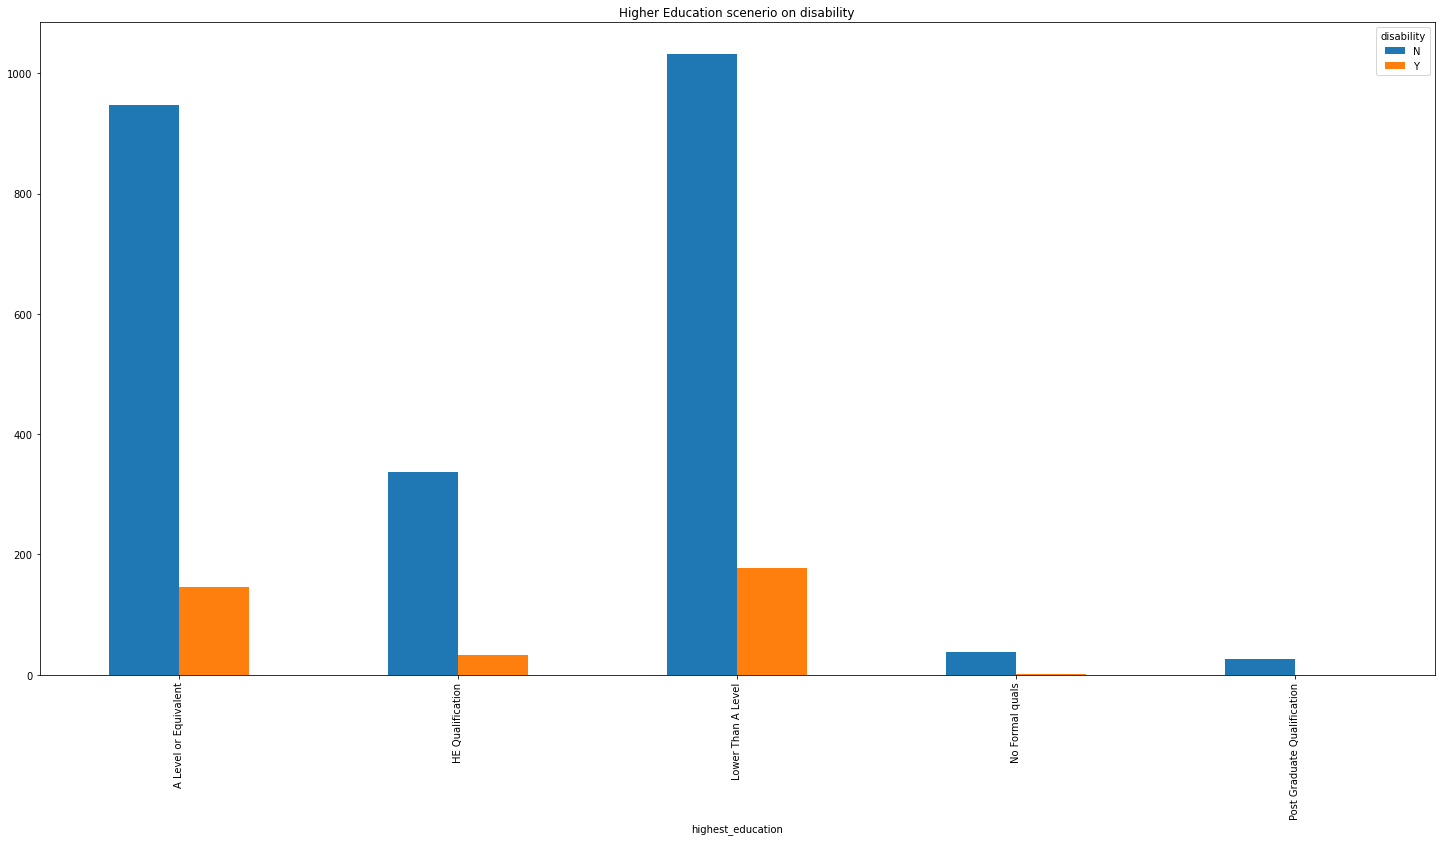

In [37]:
filtered_student_info_previous_attempt_not_0.groupby(['highest_education','disability']).size().unstack().plot(kind='bar', title='Higher Education scenerio on disability',figsize=(25,12))
plt.show()

Question: How are the disability effect those students whose education level is lower than A level?

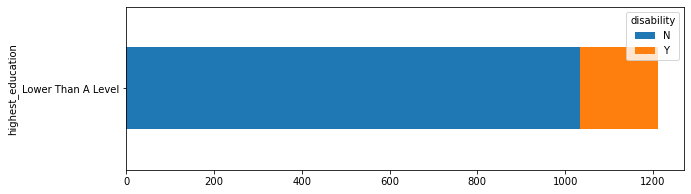

In [38]:
filtered_student_info_previous_attempt_not_0_lower_A_Level = filtered_student_info_previous_attempt_not_0[filtered_student_info_previous_attempt_not_0["highest_education"]== "Lower Than A Level"]
pd.crosstab(filtered_student_info_previous_attempt_not_0_lower_A_Level.highest_education, student_info.disability).plot.barh(stacked = True, figsize=(10,3));

Question: Which course module are more frequently takes on each semester?

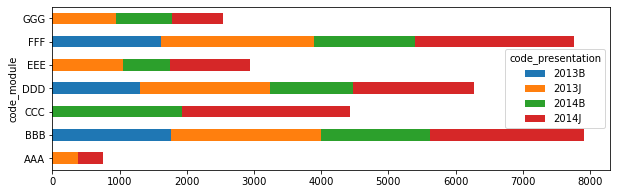

In [39]:
pd.crosstab(student_info.code_module, student_info.code_presentation).plot.barh(stacked = True, figsize=(10,3));

Question: Which course module are more frequently takes on each semester for which education level is lower than A level?

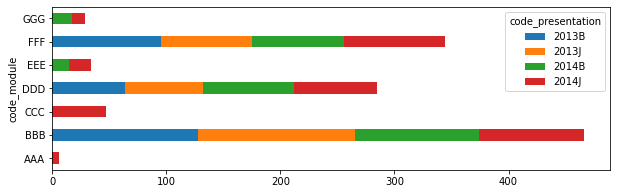

In [40]:
pd.crosstab(filtered_student_info_previous_attempt_not_0_lower_A_Level.code_module, filtered_student_info_previous_attempt_not_0_lower_A_Level.code_presentation).plot.barh(stacked = True, figsize=(10,3));

Question:Which course module need to have previous attempt for student which education level is lower than A level?

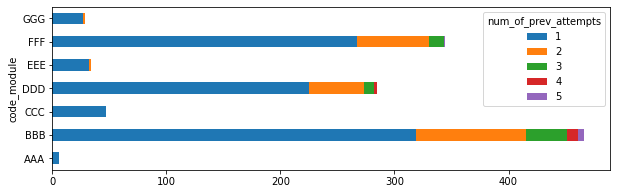

In [41]:
pd.crosstab(filtered_student_info_previous_attempt_not_0_lower_A_Level.code_module, filtered_student_info_previous_attempt_not_0_lower_A_Level.num_of_prev_attempts).plot.barh(stacked = True, figsize=(10,3));

In [42]:
filtered_student_info_previous_attempt_not_0_lower_A_Level.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
422,AAA,2014J,135335,F,East Anglian Region,Lower Than A Level,20-30%,0-35,1,120,N,Withdrawn
435,AAA,2014J,155984,F,East Anglian Region,Lower Than A Level,70-80%,0-35,1,120,N,Pass
651,AAA,2014J,1472925,F,East Anglian Region,Lower Than A Level,40-50%,35-55,1,60,Y,Pass
670,AAA,2014J,1970390,M,West Midlands Region,Lower Than A Level,0-10%,35-55,1,120,N,Pass
675,AAA,2014J,2073016,F,London Region,Lower Than A Level,30-40%,35-55,1,60,N,Fail


Drop all rows that contain '?' 

In [43]:
filtered_student_info_previous_attempt_not_0_lower_A_Level = filtered_student_info_previous_attempt_not_0_lower_A_Level[(filtered_student_info_previous_attempt_not_0_lower_A_Level != '?').all(axis=1)]

/Users/rayansami/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Question: How was the imd band Stats based on number of attempt for student which education level is lower than A level?

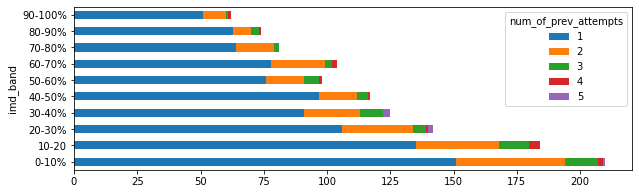

In [44]:
pd.crosstab(filtered_student_info_previous_attempt_not_0_lower_A_Level.imd_band, filtered_student_info_previous_attempt_not_0_lower_A_Level.num_of_prev_attempts).plot.barh(stacked = True, figsize=(10,3));

Question: How was the final Result Stats based on Course Module for student which education level is lower than A level?

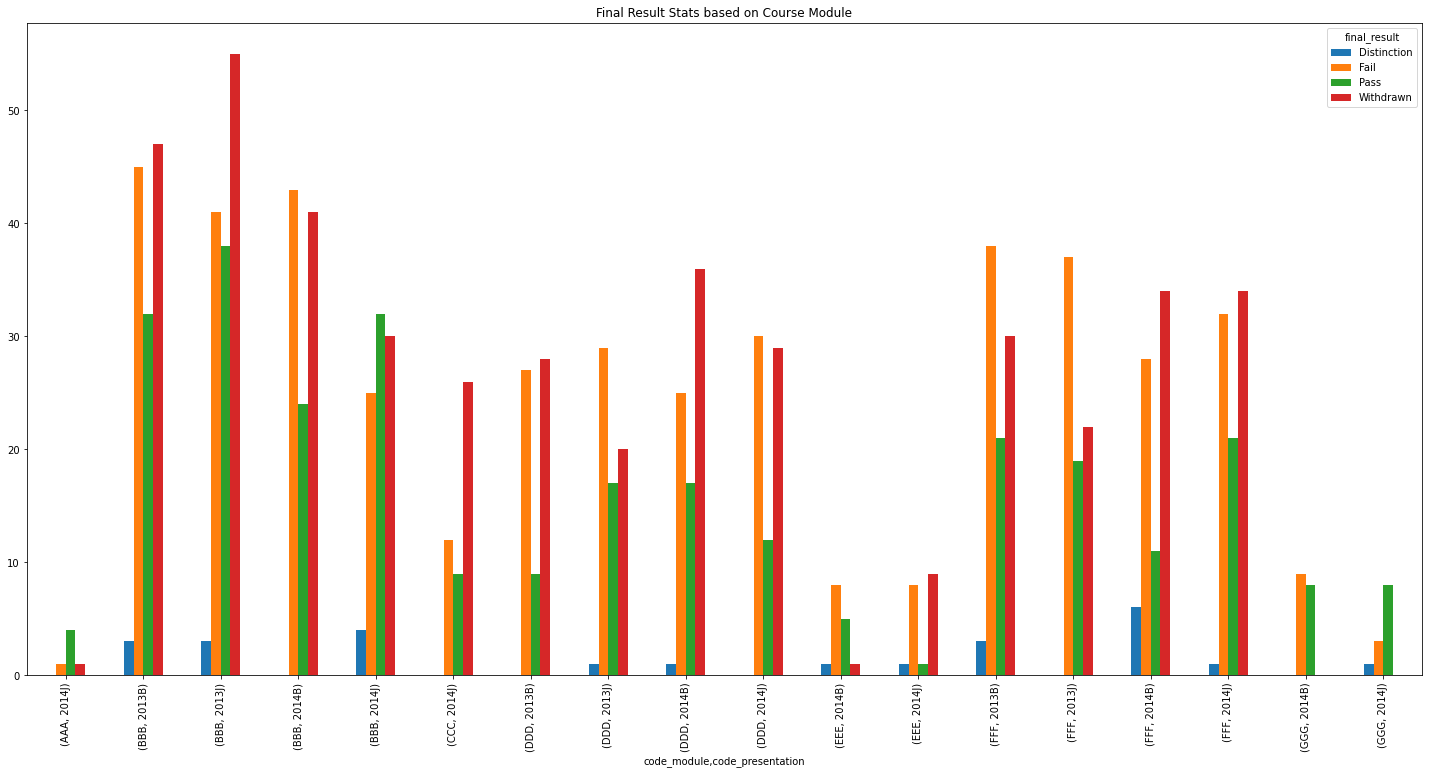

In [45]:
filtered_student_info_previous_attempt_not_0_lower_A_Level.groupby(['code_module','code_presentation','final_result']).size().unstack().plot(kind='bar', title='Final Result Stats based on Course Module',figsize=(25,12))
plt.show()

Question: How was the final Result Stats based on Gender for students whose education level is lower than A level?

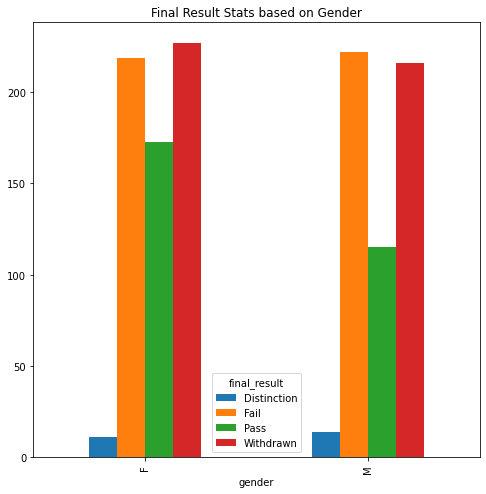

In [46]:
filtered_student_info_previous_attempt_not_0_lower_A_Level.groupby(['gender','final_result']).size().unstack().plot(kind='bar', title='Final Result Stats based on Gender',figsize=(8,8))
plt.show()

It shows withdran rate is much higher with Male and Fail rate is higher with Female.

In [47]:
# Join Student_Vle and filtered_student_info_previous_attempt_not_0_lower_A_Level
student_clicks = student_vle.groupby(['id_student', 'code_module', 'code_presentation']).agg({'sum_click':['mean','sum']})
student_clicks.reset_index(level=[0,1,2], inplace=True)
student_clicks.columns = ['id_student', 'code_module', 'code_presentation', 'mean_clicks', 'sum_clicks']
#student_clicks
# merging student_clicks with student info
student_course_info = pd.merge(filtered_student_info_previous_attempt_not_0_lower_A_Level,student_clicks, how='left', left_on=['id_student', 'code_module', 'code_presentation'],right_on=['id_student', 'code_module', 'code_presentation'])
student_course_info = student_course_info[['code_module','code_presentation','id_student','gender','region','highest_education','imd_band','age_band','num_of_prev_attempts','studied_credits','disability','mean_clicks','sum_clicks','final_result']]
student_course_info.reset_index(level=[0], inplace=True)
student_course_info.head()

,index,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,mean_clicks,sum_clicks,final_result
0,0,AAA,2014J,135335,F,East Anglian Region,Lower Than A Level,20-30%,0-35,1,120,N,1.777778,16.0,Withdrawn
1,1,AAA,2014J,155984,F,East Anglian Region,Lower Than A Level,70-80%,0-35,1,120,N,3.096257,1737.0,Pass
2,2,AAA,2014J,1472925,F,East Anglian Region,Lower Than A Level,40-50%,35-55,1,60,Y,3.709220,523.0,Pass
3,3,AAA,2014J,1970390,M,West Midlands Region,Lower Than A Level,0-10%,35-55,1,120,N,3.743537,3620.0,Pass
4,4,AAA,2014J,2073016,F,London Region,Lower Than A Level,30-40%,35-55,1,60,N,2.306667,173.0,Fail


Question: How many clicks are getting on each final results for students whose education level is lower than A level?

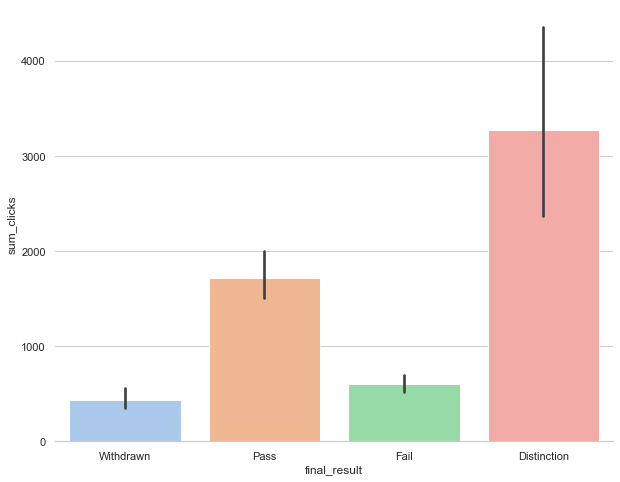

In [48]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
plt.figure(figsize=(10,8))
sns.barplot(x='final_result', y = 'sum_clicks', data = student_course_info)
sns.despine(left=True)


-------------------------------------------------------------------------------------------------------------------------------

We can see that those who got Distinction,they have almost double number of clicks then those who have Pass.

In [49]:
student_vle_merge = student_vle.merge(vle[['id_site', 'activity_type']], on='id_site', how='left')

In [50]:
student_vle_merge.head()
abc = filtered_student_info_previous_attempt_not_0_lower_A_Level.merge(student_vle_merge[['id_student', 'code_presentation','code_module']], on='id_student', how='right')
abc = student_course_info[['code_module','code_presentation','id_student','gender','region','age_band','num_of_prev_attempts''mean_clicks','sum_clicks','activity_type','final_result']]
abc.reset_index(level=[0], inplace=True)
abc.head()

KeyError: "['activity_type', 'num_of_prev_attemptsmean_clicks'] not in index"

In [51]:
student_clicks = student_vle.groupby(['id_student', 'code_module', 'code_presentation']).agg({'sum_click':['mean','sum']})
student_clicks.reset_index(level=[0,1,2], inplace=True)
student_clicks.columns = ['id_student', 'code_module', 'code_presentation', 'mean_clicks', 'sum_clicks']
#student_clicks
# merging student_clicks with student info
student_course_info = pd.merge(filtered_student_info_previous_attempt_not_0_lower_A_Level,student_clicks, how='left', left_on=['id_student', 'code_module', 'code_presentation'],right_on=['id_student', 'code_module', 'code_presentation'])
student_course_info = pd.merge(student_course_info,vle, how='left', left_on=['code_module', 'code_presentation'],right_on=['code_module', 'code_presentation'])
student_course_info = student_course_info[['code_module','code_presentation','id_student','gender','region','highest_education','imd_band','age_band','num_of_prev_attempts','studied_credits','disability','mean_clicks','sum_clicks','activity_type','final_result']]
student_course_info.reset_index(level=[0], inplace=True)
student_course_info

,index,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,mean_clicks,sum_clicks,activity_type,final_result
0,0,AAA,2014J,135335,F,East Anglian Region,Lower Than A Level,20-30%,0-35,1,120,N,1.777778,16.0,resource,Withdrawn
1,1,AAA,2014J,135335,F,East Anglian Region,Lower Than A Level,20-30%,0-35,1,120,N,1.777778,16.0,resource,Withdrawn
2,2,AAA,2014J,135335,F,East Anglian Region,Lower Than A Level,20-30%,0-35,1,120,N,1.777778,16.0,oucontent,Withdrawn
3,3,AAA,2014J,135335,F,East Anglian Region,Lower Than A Level,20-30%,0-35,1,120,N,1.777778,16.0,resource,Withdrawn
4,4,AAA,2014J,135335,F,East Anglian Region,Lower Than A Level,20-30%,0-35,1,120,N,1.777778,16.0,oucontent,Withdrawn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440879,440879,GGG,2014J,633561,F,Yorkshire Region,Lower Than A Level,70-80%,0-35,1,30,N,2.822430,302.0,resource,Pass
440880,440880,GGG,2014J,633561,F,Yorkshire Region,Lower Than A Level,70-80%,0-35,1,30,N,2.822430,302.0,resource,Pass
440881,440881,GGG,2014J,633561,F,Yorkshire Region,Lower Than A Level,70-80%,0-35,1,30,N,2.822430,302.0,oucontent,Pass
440882,440882,GGG,2014J,633561,F,Yorkshire Region,Lower Than A Level,70-80%,0-35,1,30,N,2.822430,302.0,resource,Pass


In [52]:
student_course_info['id_student'].nunique()

1125

Q- যারা খারাপ করসে(ফেইল এবং উইথদ্র) এবং যারা খারাপ করে নাই(পাস এবং দিস্তিংকট)  
Their sum_clicks

Q- যারা খারাপ করসে(ফেইল এবং উইথদ্র) এবং যারা খারাপ করে নাই(পাস এবং দিস্তিংকট)  
Their sum_clicks with respect to activity_type

/Users/rayansami/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/rayansami/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/rayansami/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/rayansami/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/rayansami/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/ray

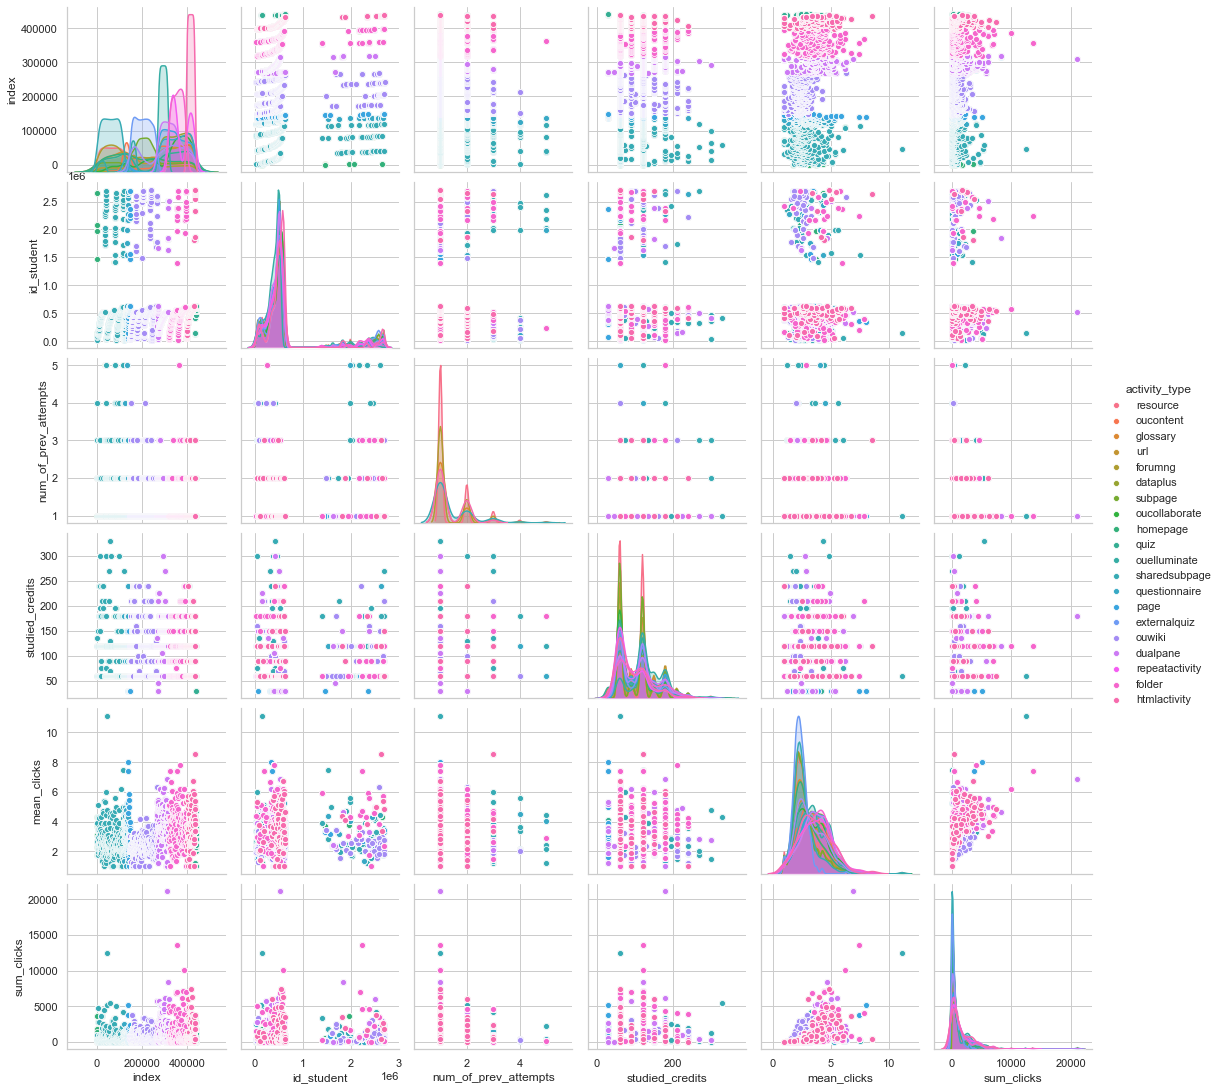

In [53]:
sns.pairplot(student_course_info, hue="activity_type");

In [54]:
student_vle_merge.head()

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type
0,AAA,2013J,28400,546652,-10,4,forumng
1,AAA,2013J,28400,546652,-10,1,forumng
2,AAA,2013J,28400,546652,-10,1,forumng
3,AAA,2013J,28400,546614,-10,11,homepage
4,AAA,2013J,28400,546714,-10,1,oucontent


Question: Which activity is most popular among the students?

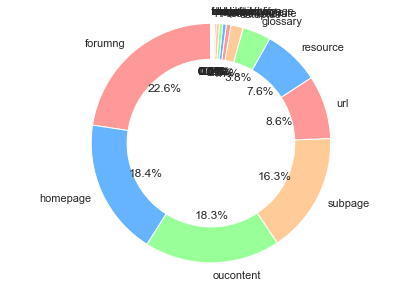

In [55]:
# Pie chart
labels = student_vle_merge['activity_type'].unique()
sizes = student_vle_merge['activity_type'].value_counts()
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

Merge <b>student_assessment</b> and <b>assessments</b>

In [56]:
student_assessment_merge = student_assessment.merge(assessments[['id_assessment', 'assessment_type', 'date', 'weight', 'code_module', 'code_presentation']], on='id_assessment', how='left')

In [57]:
student_assessment_merge.groupby(['code_module','code_presentation']).size().reset_index(name='Total_assessments')

,code_module,code_presentation,Total_assessments
0,AAA,2013J,1633
1,AAA,2014J,1516
2,BBB,2013B,11256
3,BBB,2013J,14375
4,BBB,2014B,9993
5,BBB,2014J,7408
6,CCC,2014B,7489
7,CCC,2014J,11451
8,DDD,2013B,10373
9,DDD,2013J,7936


In [58]:
print(assessments.info())
print(student_assessment.info())
print(student_assessment_merge.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code_module        206 non-null    object 
 1   code_presentation  206 non-null    object 
 2   id_assessment      206 non-null    int64  
 3   assessment_type    206 non-null    object 
 4   date               206 non-null    object 
 5   weight             206 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 9.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id_assessment   173912 non-null  int64 
 1   id_student      173912 non-null  int64 
 2   date_submitted  173912 non-null  int64 
 3   is_banked       173912 non-null  int64 
 4   score           173912 non-null  object
dtypes: int64(4), ob

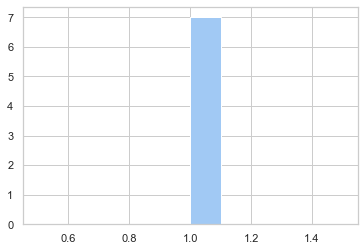

In [59]:
student_assessment_merge.code_module.groupby(student_assessment_merge.code_module).nunique().hist();

/Users/rayansami/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/rayansami/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/rayansami/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/rayansami/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/rayansami/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/ray

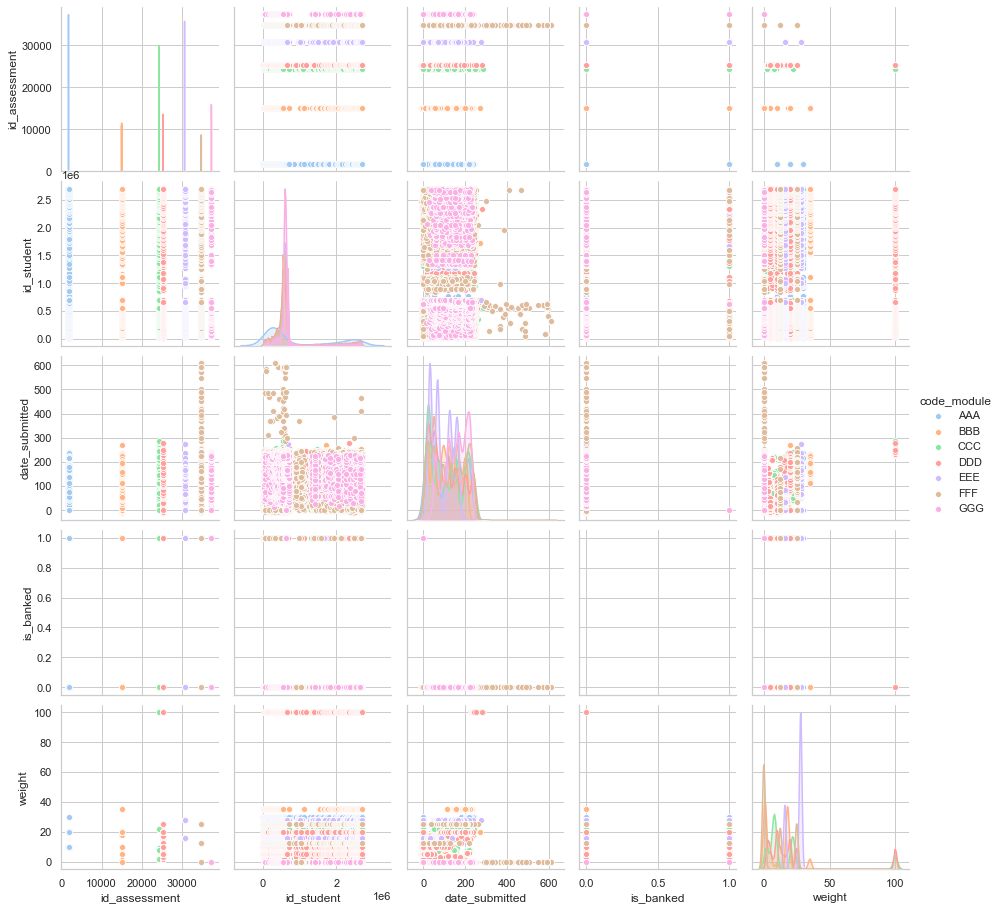

In [60]:
sns.pairplot(student_assessment_merge, hue="code_module");

Question: Which assesment type has majority among the students?

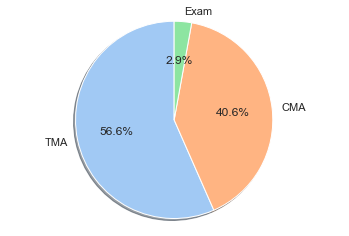

In [61]:
labels = student_assessment_merge["assessment_type"].unique()
sizes = student_assessment_merge["assessment_type"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 

plt.show()

### Determine accuracy

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_final = filtered_student_info_previous_attempt_not_0.apply(le.fit_transform)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

X = df_final.loc[:, df_final.columns != 'final_result']
y = df_final['final_result']
xTrain, xTest, yTrain, yTest = train_test_split(X, y,train_size = 0.80)

dt = tree.DecisionTreeClassifier(criterion='gini')
dt = dt.fit(xTrain, yTrain)
train_pred = dt.predict(xTrain)
test_pred = dt.predict(xTest)
print("Accuracy:{0:.3f}".format(metrics.accuracy_score(yTest, test_pred)*100),"\n")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

X = df_final.loc[:, df_final.columns != 'final_result']
y = df_final['final_result']
xTrain, xTest, yTrain, yTest = train_test_split(X, y,train_size = 0.80)

rf = RandomForestClassifier(n_estimators=10,random_state=33)
rf = rf.fit(xTrain, yTrain)
train_pred = rf.predict(xTrain)
test_pred = rf.predict(xTest)
print("Accuracy:{0:.3f}".format(metrics.accuracy_score(yTest, test_pred)*100),"\n")